In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [27]:
def plot_top_products(dataframe, id):
    # Group the data by product and sum the quantity
    products = dataframe.groupby('Description').sum(numeric_only=False)['Quantity']
    # Sort the products by quantity
    products = products.sort_values(ascending=False)
    # Plot the top 10 products
    products.iloc[:10].plot(kind='bar')
    plt.xlabel('Product')
    plt.ylabel('Quantity Sold')
    plt.title('Top 10 Selling Products')
    plt.savefig(f'data/{id}.png', bbox_inches='tight')

C:\Users\samue\AppData\Local\Temp\ipykernel_17900\409690189.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.sum is deprecated. In a future version, a TypeError will be raised. Before calling .sum, select only columns which should be valid for the function.
  products = dataframe.groupby('Description').sum(numeric_only=False)['Quantity']


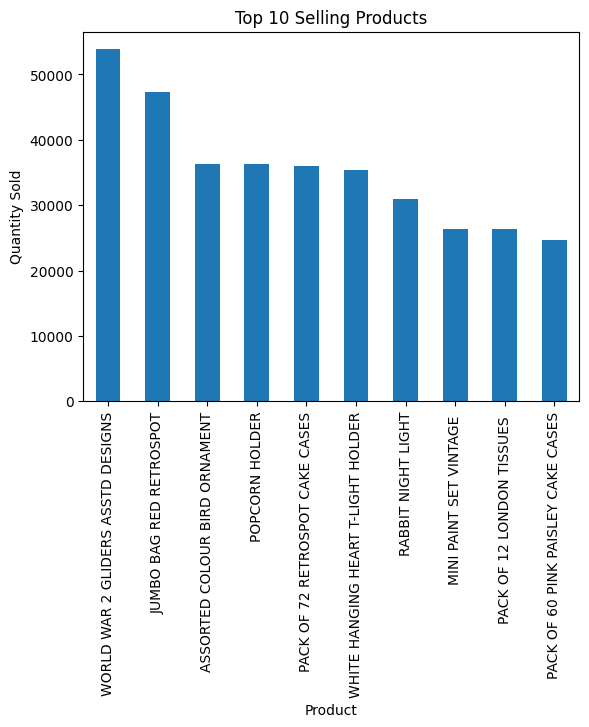

In [28]:
plot_top_products(df, 'top_products')

In [57]:
def plot_top_returned_products(dataframe, id):
    # Only get rows where quantity is less than zero
    dataframe_products = dataframe[dataframe['Quantity'] < 0]
    # Group by product and sum the quantity
    products = dataframe_products.groupby('Description')['Quantity'].sum(numeric_only=False)
    # Sort products by quantity, but since it's negative we sort in ascending order
    products = products.sort_values(ascending=True)
    # Plot the top 10 returned products
    ax = products.iloc[:10].plot(kind='bar')
    ax.invert_yaxis()
    plt.xlabel('Quantity Returned')
    plt.ylabel('Product')
    plt.title('Top 10 Returned Products')
    plt.savefig(f'data/{id}.png', bbox_inches='tight')

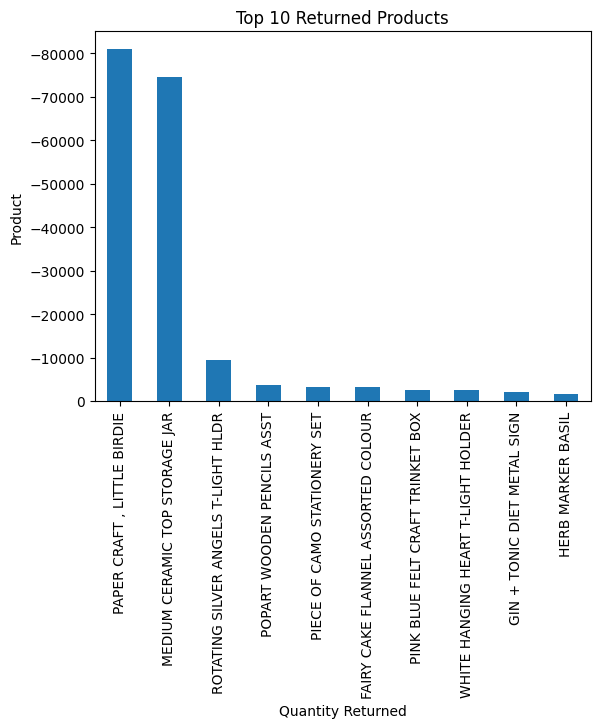

In [58]:
plot_top_returned_products(df, 'top_returned_products')

In [31]:
def plot_top_customers(dataframe, id):
    # Group the data by customer and sum the Quantity
    customers = dataframe.groupby('CustomerID')['Quantity'].sum(numeric_only=False)
    # Sort the customers by quantity
    customers = customers.sort_values(ascending=False)
    # Plot the top 10 customers
    customers.head(10).plot(kind='bar')
    plt.xlabel('Customer ID')
    plt.ylabel('Quantity Purchased')
    plt.title('Top 10 Customers by Quantity Purchased')
    plt.savefig(f'data/{id}.png', bbox_inches='tight')

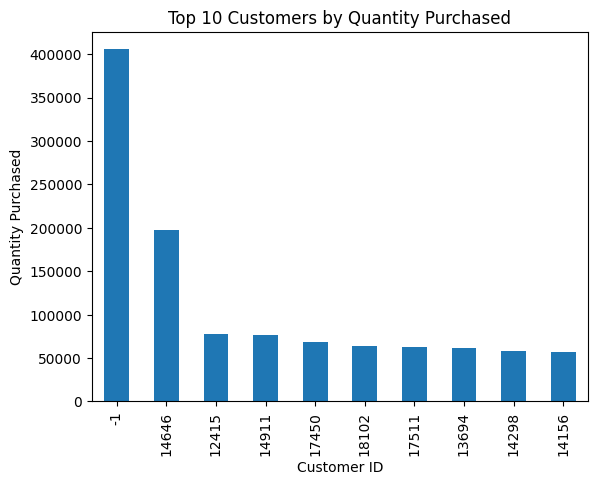

In [32]:
plot_top_customers(df, 'top_customers')

In [35]:
def plot_top_returned_customers(dataframe, id):
    # Group by customer and sum the Quantity
    products = dataframe.groupby('CustomerID')['Quantity'].sum(numeric_only=False)
    # Sort customer by quantity, but since it's negative we sort in ascending order
    products = products.sort_values(ascending=True)
    # Plot the top 10 returned customers
    ax = products.iloc[:10].plot(kind='bar')
    ax.invert_yaxis()
    plt.xlabel('Quantity Returned')
    plt.ylabel('Customers')
    plt.title('Top 10 Returned Customers')
    plt.savefig(f'data/{id}.png', bbox_inches='tight')

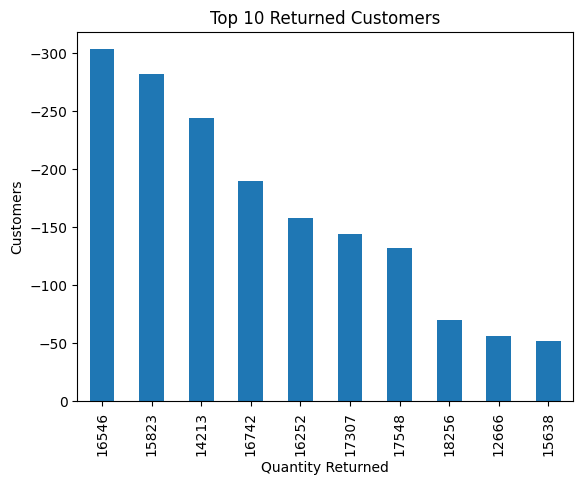

In [36]:
plot_top_returned_customers(df, 'top_returned_customers')

In [40]:
def plot_top_products_by_country(dataframe, id, country=None):
    # Only get rows where quantity is greater than zero (to ignore returns)
    df = dataframe[dataframe['Quantity'] > 0]
    countries = df['Country'].unique()
    if country:
        if country not in countries:
            print(f"Country '{country}' not found in data.")
            return
        countries = [country]
    for country in countries:
        # Filter data to include only rows for current country
        df_country = df[df['Country'] == country]
        # Group by product and sum the quantity
        products = df_country.groupby('Description')['Quantity'].sum(numeric_only=False)
        # Sort products by quantity
        products = products.sort_values(ascending=False)
        # Plot the top 10 products
        products.iloc[:10][:10].plot(kind='bar')
        plt.xlabel('Product')
        plt.ylabel('Quantity Sold')
        plt.title('Top 10 Sold Products in {}'.format(country))
        plt.savefig(f'data/{id}.png', bbox_inches='tight')

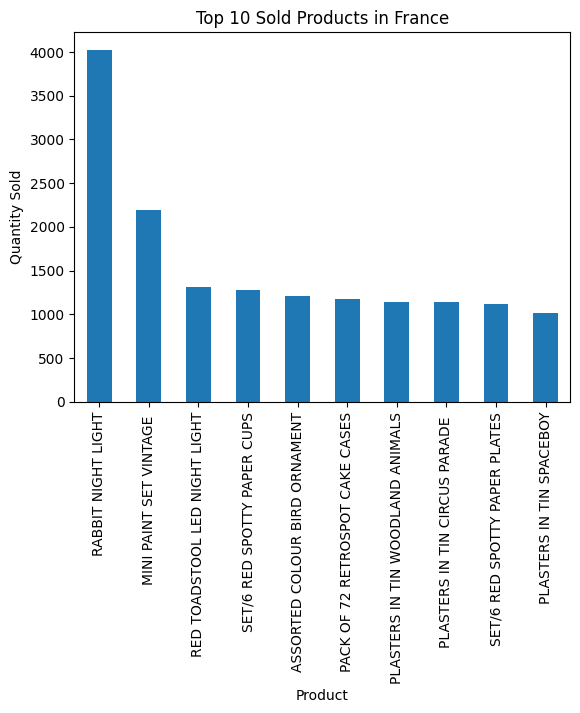

In [41]:
plot_top_products_by_country(df, 'top_products_by_country', 'France')

In [51]:
def plot_sales_and_price_variation(dataframe, product_name, start_date, end_date, id1, id2):
    """
    :param dataframe: DataFrame of invoices
    :param product_name: name of the product
    :param start_date: start date of the period to study in the format 'yyyy-mm-dd'
    :param end_date: end date of the period to study in the format 'yyyy-mm-dd'
    """
    # Filter the dataframe by product name and date
    df['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])
    df_filtered = df[(df['Description'] == product_name) & (df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]
    # Group by date and get the sum of Quantity and mean of UnitPrice
    df_grouped_quantity = df_filtered.groupby(df_filtered['InvoiceDate'].dt.date)['Quantity'].sum(numeric_only=False)
    df_grouped_unitprice = df_filtered.groupby(df_filtered['InvoiceDate'].dt.date)['UnitPrice'].mean(numeric_only=False)
    # Plot the sales variation
    plt.plot(df_grouped_quantity.index, df_grouped_quantity.values)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Total Quantity Sold')
    plt.title(f'Sales variation of {product_name}')
    plt.savefig(f'data/{id1}.png', bbox_inches='tight')
    plt.clf()
    
    # Plot the price variation
    plt.plot(df_grouped_unitprice.index, df_grouped_unitprice.values)
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Average Unit Price')
    plt.title(f'Price variation of {product_name}')
    plt.savefig(f'data/{id2}.png', bbox_inches='tight')

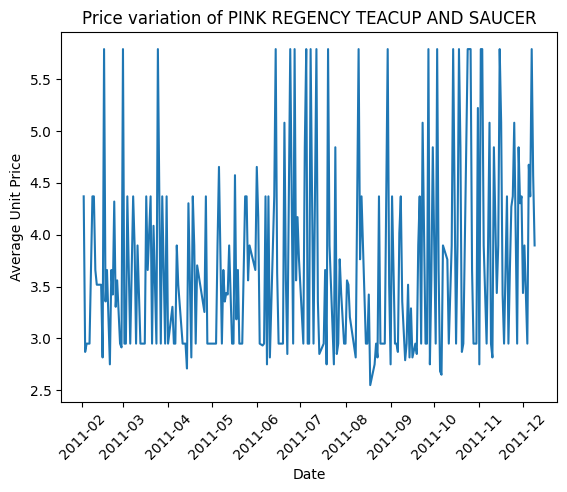

In [52]:
plot_sales_and_price_variation(df, 'PINK REGENCY TEACUP AND SAUCER', '2011-01-01', '2011-12-31', 'sales_variation', 'price_variation')

In [55]:
def plot_customer_purchases_in_period(dataframe, customer_id, start_date, end_date, id, product_name=None):
    # Filter dataframe by customer ID
    df = dataframe[dataframe['CustomerID'] == customer_id]
    # Filter dataframe by date
    df = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]
    # Filter dataframe by product name
    if product_name:
        df = df[df['Description'] == product_name]
    # Create a column with the month of the purchase
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['month'] = df['InvoiceDate'].dt.to_period('M')
    # Group by month and sum the Quantity
    purchases = df.groupby('month')['Quantity'].sum()
    # Plot purchases by month
    if product_name:
        title = 'Purchases of {} by Month'.format(product_name)
    else:
        title = 'Total Purchases by Month'
    purchases.plot(kind='bar', title=title)
    plt.xlabel('Month')
    plt.ylabel('Quantity Purchased')
    plt.savefig(f'data/{id}.png', bbox_inches='tight')

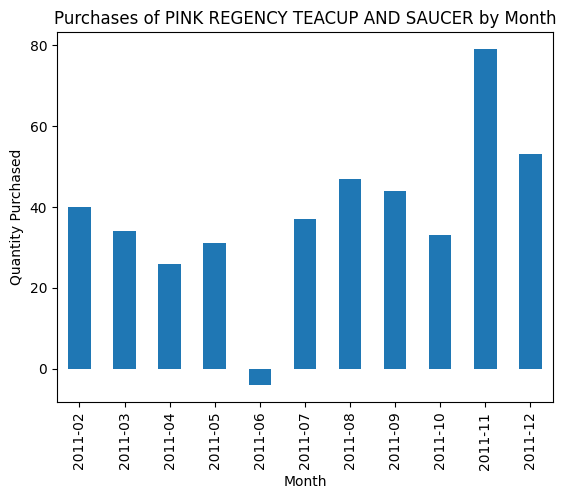

In [56]:
plot_customer_purchases_in_period(df, -1, '2011-01-01', '2011-12-31', 'customer_purchases', 'PINK REGENCY TEACUP AND SAUCER')